In [ ]:
# Core Perform Market Basket Analysis

In [36]:
import pandas as pd
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import squarify
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.preprocessing import TransactionEncoder

In [46]:
!pip install mlxtend

In [3]:
df = pd.read_csv('df_3.csv')

C:\Users\Admin\AppData\Local\Temp\ipykernel_6984\3225369045.py:1: DtypeWarning: Columns (16,22,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('df_3.csv')


In [4]:
# Drop rows where direction = -1
df = df[df['direction'] != -1]

In [5]:
# Creating a dataframe 'dfMBA' with their corresponding 'order_id' and 'product_id'

In [6]:
dfMBA = df[['order_id', 'product_id']]

In [7]:
dfMBA.dropna()

,order_id,product_id
0,e0bfcd988e880f2827fd31f6bf54f694,32157580.0
2,c083d094f3d4d5810d8446370462793c,35609266.0
3,c083d094f3d4d5810d8446370462793c,35609252.0
4,c083d094f3d4d5810d8446370462793c,32882024.0
5,c083d094f3d4d5810d8446370462793c,35649705.0
...,...,...
940884,204030d6d910ad86de3b35d33ddbcbc9,35874006.0
940885,204030d6d910ad86de3b35d33ddbcbc9,30634464.0
940886,204030d6d910ad86de3b35d33ddbcbc9,81256063.0
940887,204030d6d910ad86de3b35d33ddbcbc9,35065352.0


In [ ]:
# Convert the Dataframe 'dfMBA' into transactional format.

In [8]:
df1 = dfMBA.groupby(['order_id', 'product_id'])['product_id'].count().reset_index(name ='Count')
df1.head()

,order_id,product_id,Count
0,000031824fe4f468fc8f68c02e421118,81273876.0,1
1,00006ee3400d3ae49bed9a904f234500,34916056.0,1
2,0000901a817e533f4a95d2839c5575a3,33651121.0,1
3,0000901a817e533f4a95d2839c5575a3,35874272.0,1
4,0000901a817e533f4a95d2839c5575a3,36238020.0,1


In [9]:
# Compute a count for the purchases for each product
prod_count = df1['product_id'].value_counts().reset_index()
prod_count.columns = ['product_id', 'Count']

In [10]:
prod_count

,product_id,Count
0,33700716.0,36987
1,33817091.0,16364
2,34843564.0,8297
3,32882024.0,4319
4,35209202.0,3221
...,...,...
1995,35805126.0,22
1996,32093992.0,21
1997,81259510.0,19
1998,36560713.0,12


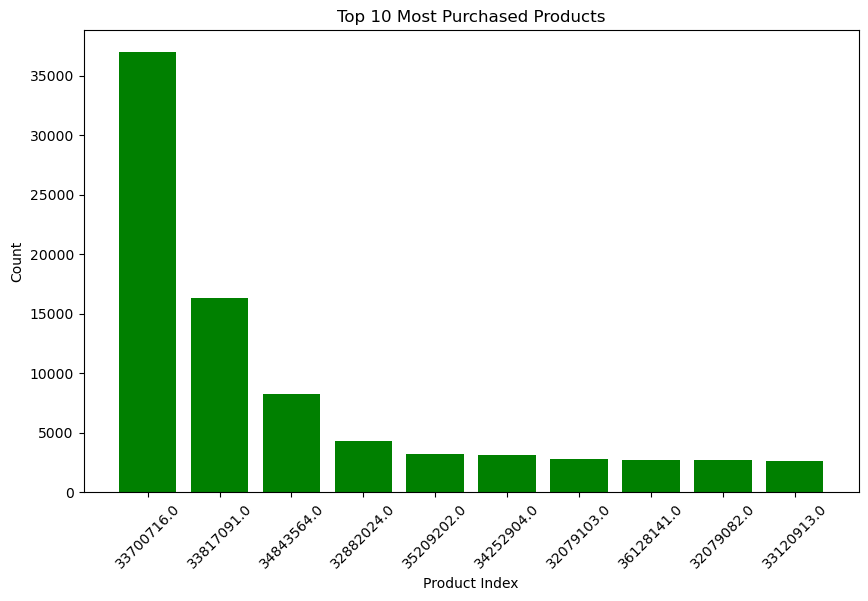

In [11]:
# Select the top 10 purchased items and show them with a barchart

top_10_items = prod_count.head(10)

plt.figure(figsize=(10, 6))
plt.bar(range(len(top_10_items)), top_10_items['Count'], color='green')
plt.xlabel('Product Index')
plt.ylabel('Count')
plt.title('Top 10 Most Purchased Products')
plt.xticks(range(len(top_10_items)), top_10_items['product_id'], rotation=45)
plt.show()

In [12]:
# Select just the top N=100 purchased products
top_N_items = prod_count.head(100)
top_N_items

,product_id,Count
0,33700716.0,36987
1,33817091.0,16364
2,34843564.0,8297
3,32882024.0,4319
4,35209202.0,3221
...,...,...
95,35895503.0,1101
96,35609273.0,1097
97,36168384.0,1079
98,31419136.0,1078


In [13]:
# Create a transactions representation
myBasket = df1.groupby('order_id')['product_id'].apply(list).reset_index(name='items')

In [14]:
myBasket

,order_id,items
0,000031824fe4f468fc8f68c02e421118,[81273876.0]
1,00006ee3400d3ae49bed9a904f234500,[34916056.0]
2,0000901a817e533f4a95d2839c5575a3,"[33651121.0, 35874272.0, 36238020.0]"
3,0000f2817342879fac36a6b9f6a55990,"[35160741.0, 35212254.0]"
4,0001231326e40e177b91e3bbe2c85358,"[35874006.0, 36531131.0]"
...,...,...
353673,ffff62942775d9efe6960e90fb12bab2,[34324451.0]
353674,ffff6dda73f7b107885741bb298a951c,[81267379.0]
353675,ffff7db23ee668ac9d0c090090f8b7a5,"[32882024.0, 35410466.0, 35411810.0, 35555961...."
353676,ffff9489890f92150cf2efe5f3125f33,[36323616.0]


In [15]:
# Filter transactions to include only the top N purchased products
filtered_transactions = myBasket[myBasket['items'].apply(lambda items: any(item in items for item in top_N_items['product_id']))]

In [16]:
filtered_transactions

,order_id,items
1,00006ee3400d3ae49bed9a904f234500,[34916056.0]
4,0001231326e40e177b91e3bbe2c85358,"[35874006.0, 36531131.0]"
9,00022115c5638382d758a0d7dd9ee0a1,"[31618300.0, 31618321.0, 32988382.0]"
11,0002c0e4b397cf5ba5496a8ff9a2311c,[35925050.0]
23,0005030aa1e0c3486da0bbadd108db5d,"[34843564.0, 36276513.0, 81259448.0, 81259450...."
...,...,...
353668,fffef1e4766017e75f0db930c336e4d6,"[33700716.0, 35662480.0, 35766080.0, 36268393.0]"
353669,ffff19170be3d012881cb3f4f518c5d1,[35895503.0]
353672,ffff54d721bb08014f192e39d8c1908c,"[31618083.0, 31618153.0, 31618300.0, 31618321...."
353675,ffff7db23ee668ac9d0c090090f8b7a5,"[32882024.0, 35410466.0, 35411810.0, 35555961...."


In [17]:
# Create a one-hot encoding representation of the transactions
# from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(filtered_transactions['items']).transform(filtered_transactions['items'])
transaction_df = pd.DataFrame(te_ary, columns=te.columns_)

In [18]:
# frequent itemset
frequent_items = apriori(transaction_df, min_support = 0.005,use_colnames = True)
frequent_items

,support,itemsets
0,0.007884,(30329663.0)
1,0.009897,(30482683.0)
2,0.005404,(31047415.0)
3,0.005817,(31047450.0)
4,0.008674,(31047464.0)
...,...,...
145,0.008330,"(32079082.0, 32079103.0, 32078935.0)"
146,0.005377,"(32079103.0, 32842551.0, 32078935.0)"
147,0.005459,"(32078970.0, 32079082.0, 32079103.0)"
148,0.007006,"(32079082.0, 32842551.0, 32079103.0)"


In [90]:
# frequent_itemsets

In [21]:
# Extract confidence and lift values
lift_rules = association_rules(frequent_items, metric="lift", min_threshold=1.0)
confidence_rules = association_rules(frequent_items, metric="confidence")

# Concatenate the rules and remove duplicates
all_rules = pd.concat([lift_rules, confidence_rules], ignore_index=True).drop_duplicates()


In [22]:
# Order the rules by lift and display the result
sorted_rules = all_rules.sort_values(by='lift', ascending=False)
print(sorted_rules[['antecedents', 'consequents', 'lift', 'confidence']])


     antecedents   consequents       lift  confidence
58  (36298122.0)  (36298206.0)  92.688501    0.553532
59  (36298206.0)  (36298122.0)  92.688501    0.859729
60  (36298353.0)  (36298381.0)  87.323424    0.739764
61  (36298381.0)  (36298353.0)  87.323424    0.850080
1   (31047485.0)  (31047464.0)  66.233029    0.574519
..           ...           ...        ...         ...
6   (31618475.0)  (31618300.0)  24.682932    0.408700
41  (32078935.0)  (32842551.0)  22.772490    0.334761
40  (32842551.0)  (32078935.0)  22.772490    0.395221
53  (32079103.0)  (33700716.0)   1.063410    0.265714
52  (33700716.0)  (32079103.0)   1.063410    0.020115

[136 rows x 4 columns]


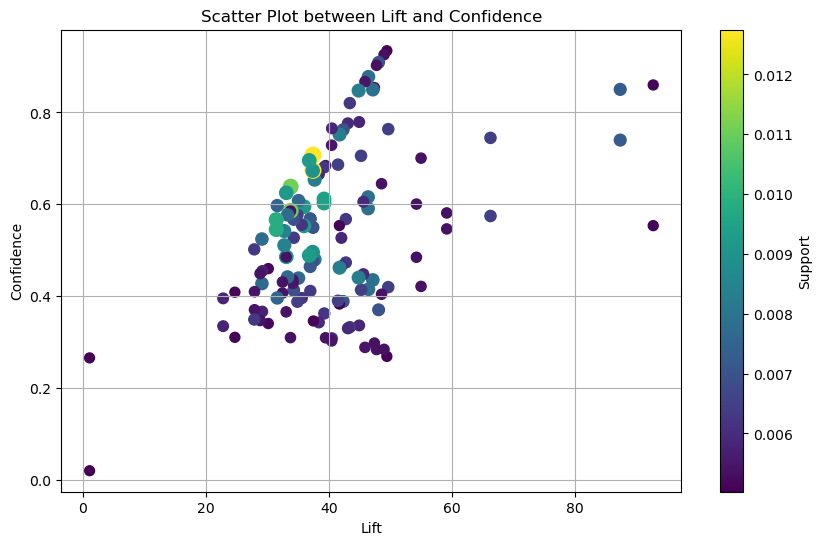

In [26]:
# import matplotlib.pyplot as plt

# Create a scatterplot showing the correlation between lift and confidence, with support as dimension and color scale
plt.figure(figsize=(10, 6))
scatter = plt.scatter(sorted_rules['lift'], sorted_rules['confidence'], s=sorted_rules['support'] * 10000, c=sorted_rules['support'], cmap='viridis')
plt.colorbar(scatter, label='Support')
plt.xlabel('Lift')
plt.ylabel('Confidence')
plt.title('Scatter Plot between Lift and Confidence')
plt.grid(True)
plt.show()


In [28]:
rules = sorted_rules.copy()

In [29]:
# Convert antecedents and consequents to string data
rules['antecedents'] = rules['antecedents'].apply(lambda x: ', '.join(map(str, x)))
rules['consequents'] = rules['consequents'].apply(lambda x: ', '.join(map(str, x)))


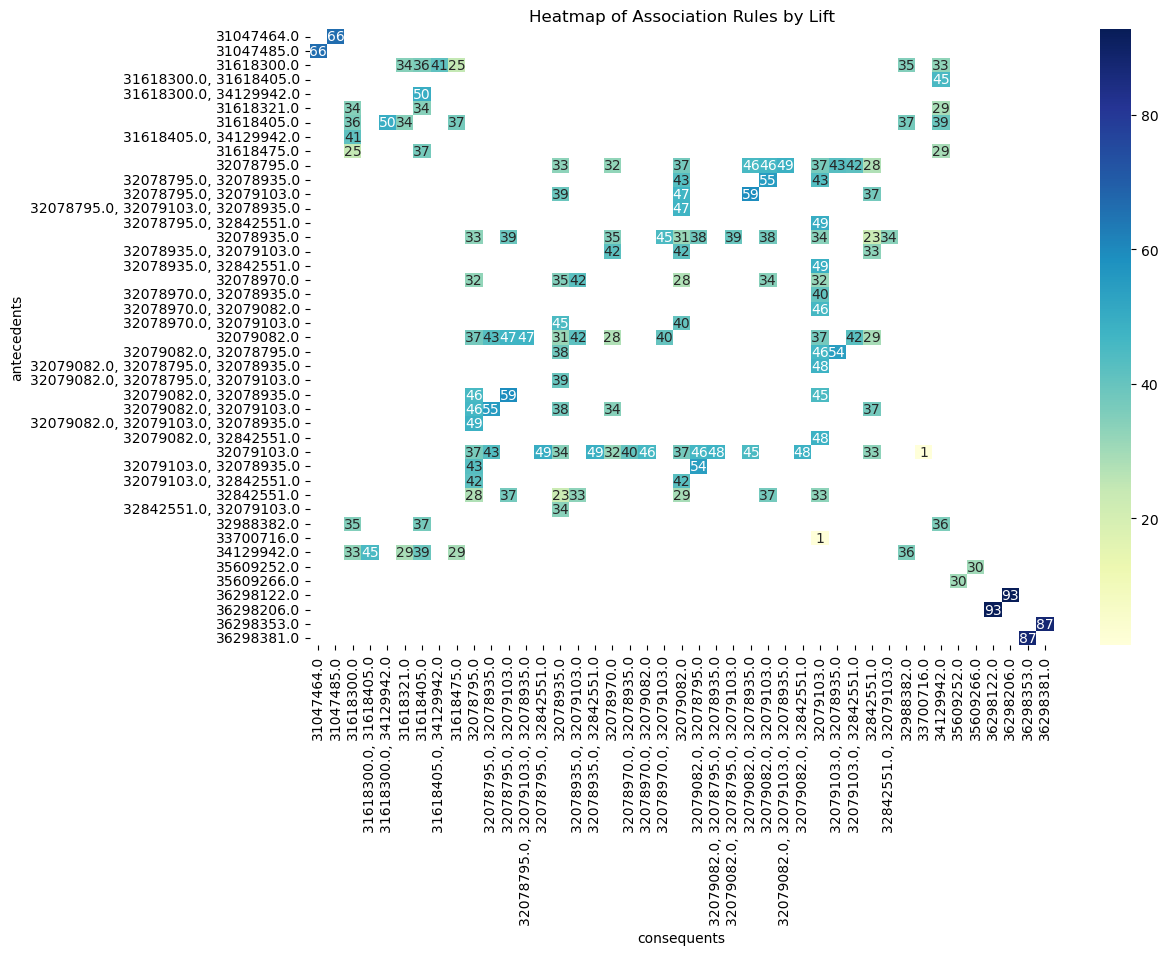

In [30]:
# Create a data matrix to use for the heatmap
heatmap_data = pd.pivot_table(rules, values='lift', index='antecedents', columns='consequents')

# Customize graph dimension
plt.figure(figsize=(12, 8))

# Create the heatmap with seaborn
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu")

# Set a title
plt.title('Heatmap of Association Rules by Lift')

# Show the heatmap
plt.show()

In [31]:
top_10_lift = rules.sort_values(by='lift', ascending=False).head(10)
print(top_10_lift[['antecedents', 'consequents', 'lift']])

                antecedents             consequents       lift
58               36298122.0              36298206.0  92.688501
59               36298206.0              36298122.0  92.688501
60               36298353.0              36298381.0  87.323424
61               36298381.0              36298353.0  87.323424
1                31047485.0              31047464.0  66.233029
0                31047464.0              31047485.0  66.233029
130  32078795.0, 32079103.0  32079082.0, 32078935.0  59.122543
127  32079082.0, 32078935.0  32078795.0, 32079103.0  59.122543
128  32079082.0, 32079103.0  32078795.0, 32078935.0  54.945792
129  32078795.0, 32078935.0  32079082.0, 32079103.0  54.945792


In [32]:
top_10_confidence = rules.sort_values(by='confidence', ascending=False).head(10)
print(top_10_confidence[['antecedents', 'consequents', 'confidence']])

                            antecedents consequents  confidence
86               32078795.0, 32842551.0  32079103.0    0.934243
106              32078935.0, 32842551.0  32079103.0    0.925581
116              32079082.0, 32842551.0  32079103.0    0.908852
122  32079082.0, 32078795.0, 32078935.0  32079103.0    0.902384
80               32079082.0, 32078795.0  32079103.0    0.877644
110              32078970.0, 32079082.0  32079103.0    0.866953
59                           36298206.0  36298122.0    0.859729
125  32078795.0, 32079103.0, 32078935.0  32079082.0    0.853921
61                           36298381.0  36298353.0    0.850080
82               32078795.0, 32079103.0  32079082.0    0.849415


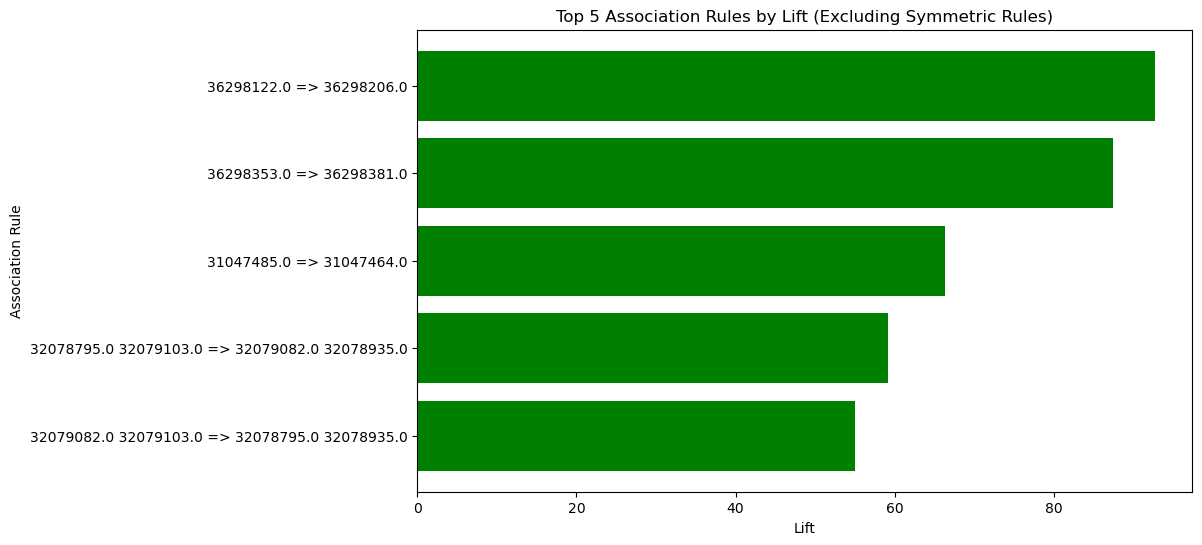

In [33]:
# Create a horizontal bar chart for the top 10 lift rules (actually 5, as they are symmetrical)

# Remove symmetrical rules
seen_rules = set()
filtered_rules = []
rule_labels = []
for _, row in top_10_lift.iterrows():
    rule_tuple = (frozenset(row['antecedents']), frozenset(row['consequents']))
    if rule_tuple not in seen_rules and (rule_tuple[1], rule_tuple[0]) not in seen_rules:
        seen_rules.add(rule_tuple)
        filtered_rules.append(row)
        # Create a lable without commas
        antecedent_label = ''.join(map(str, row['antecedents'])).replace(',', '')
        consequent_label = ''.join(map(str, row['consequents'])).replace(',', '')
        rule_labels.append(f"{antecedent_label} => {consequent_label}")

filtered_rules_df = pd.DataFrame(filtered_rules)

# Create the graph
plt.figure(figsize=(10, 6))
plt.barh(range(len(filtered_rules_df)), filtered_rules_df['lift'], color='green')
plt.yticks(range(len(filtered_rules_df)), rule_labels)
plt.xlabel('Lift')
plt.ylabel('Association Rule')
plt.title('Top 5 Association Rules by Lift (Excluding Symmetric Rules)')
plt.gca().invert_yaxis()  # Reverse the order of the rules to display the most important one at the top
plt.show()

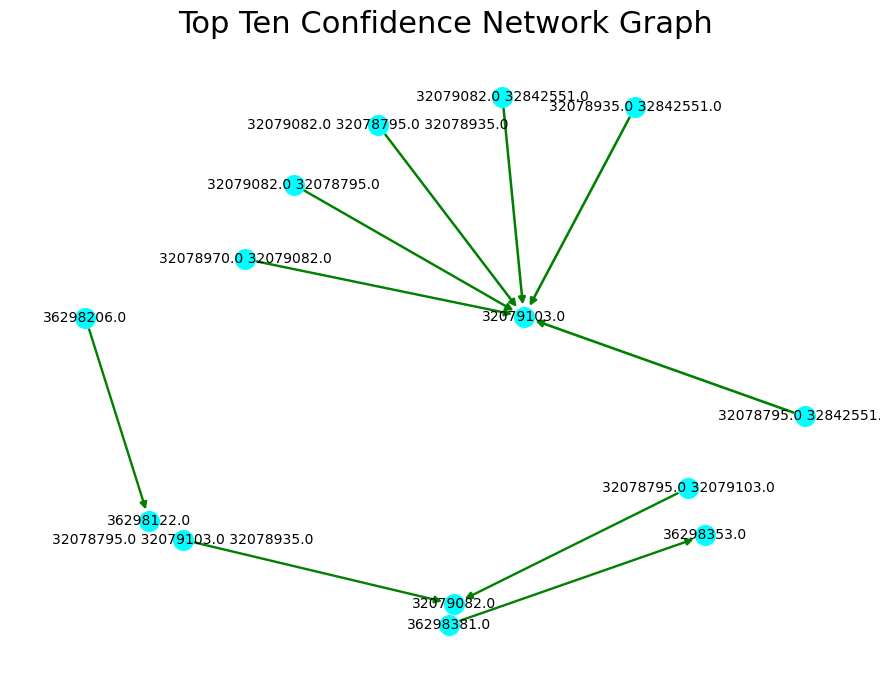

In [35]:
# Create a direct graph
G = nx.DiGraph()

# Add nodes and edges to the graph
for index, row in top_10_confidence.iterrows():
    antecedent = ''.join(map(str, row['antecedents'])).replace(',', '')
    consequent = ''.join(map(str, row['consequents'])).replace(',', '')
    confidence = row['confidence']
    G.add_edge(antecedent, consequent, weight=confidence)

# Position the nodes using the Kamada-Kawai layout algorithm
pos = nx.kamada_kawai_layout(G)

# Customize the dimensions of the chart
plt.figure(figsize=(9, 7))

# Draw nodes and edges
nx.draw_networkx_nodes(G, pos, node_size=200, alpha=1, node_color='cyan')
nx.draw_networkx_edges(G, pos, width=[d['weight'] * 2 for (u, v, d) in G.edges(data=True)], edge_color='green')
nx.draw_networkx_labels(G, pos, labels={node: node for node in G.nodes()}, font_size=10)

# Set the graph title and show the graph
plt.title('Top Ten Confidence Network Graph', fontsize=22)
plt.axis('off')
plt.tight_layout()
plt.show()